# Constraint Statisfaction Problem (Graph Coloring)

**Problem Statement** - *Given a graph with N no. of nodes and C no. of colors, color every node such that no 2 adjacent nodes are of the same color.* 

## Methods ##
1. Simple Backtracking
2. Local Search
3. Backtracking with Forward Checking
4. AC3 Backtracking search

In [76]:
#* All Imports
import numpy as np
import sys
import networkx as nx
import matplotlib.pyplot as plt

## Data-Structures for graph representation
1. *Class Edge is used to represent edge from node(i) to node(j)*
2. *Class Graph is used to represnt the entire Graph*

In [77]:
NODES = 7
COLORS = 3

#* Initial Color Matrix
color_matrix = [[1 for i in range(0, COLORS)] for j in range(0, NODES)]
def reset():
    color_matrix = [[1 for i in range(0, COLORS)] for j in range(0, NODES)]

class Edge:
    def __init__(self, i, j):
        self.source = i
        self.destination = j

class Graph:
    def __init__(self, edges):
        self.adjacency_list = [[] for i in range(0, NODES)]
        for edge in edges:
            self.adjacency_list[edge.source].append(edge.destination)
            self.adjacency_list[edge.destination].append(edge.source)

    def __str__(self):
        output = ""
        for i in range(0, len(self.adjacency_list)):
            output += "Node " + str(i) + " -> " + str(self.adjacency_list[i]) + "\n";
        return output

## Common helper functions

### Select Node function

In [78]:
def select_node(graph, assigned):
    ans = list()
    max_value = 0
    min_color = 999999

    for i in range(0, NODES):
        value = len(graph.adjacency_list[i])

        #* Get the values with min possible colors and max neighbours
        allowed = sum(color_matrix[i])
        
        if min_color > allowed and assigned[i] == -1:
            min_color = allowed
        
        if value > max_value and assigned[i] == -1:
            max_value = value
    
    for i in range(0, NODES):
        allowed = sum(color_matrix[i])
        if (allowed == min_color and assigned[i] == -1):
            ans.append(i)
    
    if len(ans) == 1:
        return ans[0]
    
    for i in range(0, NODES):
        if max_value == len(graph.adjacency_list[i]) and assigned[i] == -1:
            return i

### Select color function

In [79]:
#* Helper function for selecting the best possible color for selected node
def select_color(graph, node, color, assigned):
    s = 0
    values = list()

    #* Check if node has any avaliable color choices
    if (sum(color_matrix[node]) == 0): return -1

    for i in range(0, COLORS):
        for adj in graph.adjacency_list[node]:

            if assigned[adj] == -1:
                s += sum(color_matrix[adj])
            
            if color_matrix[adj][i] == 1 and assigned[adj] == -1:
                s = s - 1
        values.append([s, i])
        s = 0
    values = sorted(values)

    if color < len(values):
        return values[color][1]
    
    return -1

### Constraint Check

In [80]:
#* Checking if color assignment is feasible
def check_consistency(graph, node, color_value, assigned):
    for neigh in graph.adjacency_list[node]:
        if assigned[neigh] == color_value:
            return False
    return True

## Simple Backtracking

In [81]:
#* Simple Backtracking Algorithm implementation
def simple_backtracking(graph, assigned):

    return_ans = True
    assign = False

    #* Check if all colors are assigned
    for i in range(0, NODES):
        if assigned[i] == -1:
            return_ans = False
            break

    if return_ans: return assigned

    #* Getting the best node possible
    node = select_node(graph, assigned)

    print("Selected Node = " + str(node))

    for color in range(0, COLORS):
        color_value = color
        if color_value == -1:
            return
        
        if check_consistency(graph, node, color_value, assigned):
            assigned[node] = color_value
            assign = True
            print("COLOR given to Node " + str(node) + " is " + str(color_value))

            result = simple_backtracking(graph, assigned)
            if (len(result) != 1):
                return result
        if assign: assigned[node] = -1
    return

## Forward Backtracking

### Update Forward

In [82]:
#* Checking Forward and updating color before time
def add_forward(graph, node, color_value):
    for neigh in graph.adjacency_list[node]:
        color_matrix[neigh][color_value] = 0

### Revert Forward

In [83]:
#* Reverting any changes made by add_forward function
def revert_forward(color_value, temp):
    for i in range(0, NODES):
        color_matrix[i][color_value] = temp[i]

### Forward Constraint Check

In [84]:
#* check if neighbours have possible colors avaliable
def check_forward(graph, node, color_value):
    for neigh in graph.adjacency_list[node]:
        color_matrix[neigh][color_value] = 0
        if (sum(color_matrix[neigh]) == 0): return False
    return True

### ForwardCheck Backtrack

In [85]:
def forwardCheck_backtracking(graph, assigned):
    return_ans = True
    assign = False
    ans = list()
    temp = list()
    forward = False

    #* Check if all colors are assigned
    for i in range(0, NODES):
        if assigned[i] == -1:
            return_ans = False
            break
    
    if return_ans: return assigned

    #* Getting the best node possible
    node = select_node(graph, assigned)

    print("Selected Node = " + str(node))

    for color in range(0, COLORS):
        color_value = select_color(graph, node, color, assigned)

        if color_value == -1:
            ans.append(-1)
            return ans
        
        if check_consistency(graph, node, color_value, assigned):
            assigned[node] = color_value

            print("COLOR given to Node " + str(node) + " is " + str(color_value))
            assign = True

            for i in range(0, NODES):
                    temp.append(color_matrix[i][color_value])

            inference = check_forward(graph, node, color_value)
            if (inference):
                forward = True
                add_forward(graph, node, color_value)
                result = forwardCheck_backtracking(graph, assigned)

                if (len(result) != 1):
                    return result
        if assign: assigned[node] = -1
        if forward: revert_forward(color_value, temp)
    ans.append(-1)
    return ans

## AC3 Backtracking

### Revise Method (ARC Consistency)

In [86]:
#* Revising the colors to create arc consistency
def revise(xi, xj):
    revisied = False
    remove = True

    for i in range(0, COLORS):
        if color_matrix[xi][i] == 1:
            for j in range(0, COLORS):
                if color_matrix[xj][j] == 1 and i != j:
                    remove = False
                    break
            if remove:
                color_matrix[xi][i] = 0
                revisied = True
    return revisied

### AC3 function

In [87]:
#* AC3 algorithm implementation
def AC3(graph, assigned, node):
    ac3_queue = list()

    for neigh in graph.adjacency_list[node]:
        ac3_queue.append((neigh, node))
    
    while (len(ac3_queue) != 0):
        popped = ac3_queue.pop(0)

        xi = popped[0]
        xj = popped[1]

        if (revise(xi, xj)):
            if sum(color_matrix[xi]) == 0:
                return False
            
            for neigh in graph.adjacency_list[xi]:
                if assigned[neigh] == -1 and neigh != xj:
                    ac3_queue.append((neigh, xi))
    return True

### Revert on consistency fail

In [88]:
#* revert changes if any made by ac3 algorithm
def revert_inference_ac3(temp):
    for i in range(0, NODES):
        color_matrix[i] = temp[i]

### AC3

In [89]:
def backtrack(graph, assigned):
    return_ans = True
    assign = False
    add_infer = False
    ans = list()
    temp = list()

    #* Check if all colors are assigned
    for i in range(0, NODES):
        if assigned[i] == -1:
            return_ans = False
            break
    
    if return_ans: return assigned

    #* Getting the best node possible
    node = select_node(graph, assigned)

    print("Selected Node = " + str(node))

    for color in range(0, COLORS):
        color_value = select_color(graph, node, color, assigned)

        print("Color Selected = " + str(color_value))

        if color_value == -1:
            ans.append(-1)
            return ans
        
        if check_consistency(graph, node, color_value, assigned):
            assigned[node] = color_value

            print("COLOR given to Node " + str(node) + " is " + str(color_value))
            assign = True

            inference = AC3(graph, assigned, node)

            if inference:
                for i in range(0, NODES):
                    temp.append(color_matrix[i])
            add_infer = True
            result = backtrack(graph, assigned)

            if (len(result) != 1):
                return result
        if assign: assigned[node] = -1
        if add_infer: revert_inference_ac3(temp)
    ans.append(-1)
    return ans

## Local Search Algorithm Implementation

In [90]:
#* Check if current solution found is correct
def check_current_solution(graph, assigned):
    for i in range(0, NODES):
        for neigh in graph.adjacency_list[i]:
            if assigned[i] == assigned[neigh]:
                return False
    return True

#* Check if 2 nodes have same color
def find_conflicts(graph, assigned, node, color):
    assigned[node] = color

    cnt = 0
    for neigh in graph.adjacency_list[node]:
        if assigned[node] == assigned[neigh]:
            cnt = cnt + 1
    return cnt

#* Find which node is conflicting in the current solution
def find_conflicting_node(graph, assigned):
    conflicts = list()

    for i in range(0, NODES):
        for neigh in graph.adjacency_list[i]:
            if assigned[i] == assigned[neigh]:
                conflicts.append(i)
                break
    
    random_node = conflicts[np.random.randint(0, len(conflicts))]
    return random_node

#* Main local search algorithm implementation
def local_search(graph, assigned, max_steps):
    for i in range(0, NODES):
        assigned[i] = np.random.randint(0, COLORS)
    
    for i in range(0, max_steps):
        if (check_current_solution(graph, assigned)):
            return assigned
        
        node = find_conflicting_node(graph, assigned)
    
        min_conflicts = sys.maxsize
        current_color = 0
        for i in range(0, COLORS):
            if i != assigned[node]:
                conflicts = find_conflicts(graph, assigned, node, i)

                if conflicts < min_conflicts:
                    min_conflicts = conflicts
                    current_color = i
        assigned[node] = current_color
    return assigned

## Display Colored Graph

In [91]:
def view_graph(colors, edges):
    G = nx.DiGraph()

    edgeList = [(edge.source, edge.destination) for edge in edges]
    # for edge in edges:
    #     edgeList.append((edge.source, edge.destination))
    
    G.add_edges_from(edgeList)
    pos = nx.circular_layout(G)
    plt.figure(figsize = (7, 7))

    color_red = list()
    color_green = list()
    color_blue = list()

    for i in range(0, NODES):
        if colors[i] == 0: color_red.append(i)
        if colors[i] == 1: color_green.append(i)
        if colors[i] == 2: color_blue.append(i)

    nx.draw_networkx_nodes(G, pos, nodelist=color_red, node_size=500, node_color='red', node_shape='o')
    nx.draw_networkx_nodes(G, pos, nodelist=color_green, node_size=500, node_color='green', node_shape='o')
    nx.draw_networkx_nodes(G, pos, nodelist=color_blue, node_size=500, node_color='blue', node_shape='o')
    nx.draw_networkx_edges(G, pos, edgelist=list(G.edges()), edge_color='black', arrowstyle="-")
    nx.draw_networkx_labels(G, pos)
    plt.show()

## Main Execution

### Building Graph and CSP function



In [92]:
def CSP_Search(graph, choice):
    assigned = [-1 for i in range(0, NODES)]
    if (choice == 0):
        #* Simple Backtracking
        return simple_backtracking(graph, assigned)
    elif (choice == 1):
        #* Backtracking with forward checking
        return forwardCheck_backtracking(graph, assigned)
    elif (choice  == 2):
        #* Simple Local Search
        max_steps = 100
        return local_search(graph, assigned, max_steps) 
    elif (choice == 3):
        #* AC3 constraint check
        return backtrack(graph, assigned)

edges = [Edge(0, 1), Edge(0, 2), Edge(0, 3), 
         Edge(0, 4), Edge(0, 5), Edge(1, 2), 
         Edge(2, 3), Edge(3, 4), Edge(4, 5),
         Edge(4, 6)
]
graph = Graph(edges)

### Simple Backtracking Output



Selected Node = 0
COLOR given to Node 0 is 0
Selected Node = 4
COLOR given to Node 4 is 1
Selected Node = 2
COLOR given to Node 2 is 1
Selected Node = 3
COLOR given to Node 3 is 2
Selected Node = 1
COLOR given to Node 1 is 2
Selected Node = 5
COLOR given to Node 5 is 2
Selected Node = 6
COLOR given to Node 6 is 0
[0, 2, 1, 2, 1, 2, 0]



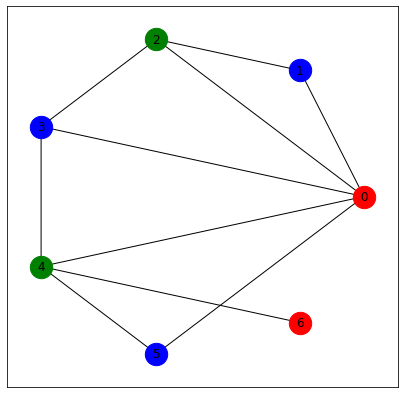

CPU times: user 436 ms, sys: 229 ms, total: 665 ms
Wall time: 405 ms


In [93]:
%%time
reset()
colors = CSP_Search(graph, 0)
print(colors)
print()
view_graph(colors, edges)

### ForwardCheck Backtracking Output

Selected Node = 0
COLOR given to Node 0 is 0
Selected Node = 4
COLOR given to Node 4 is 1
Selected Node = 2
COLOR given to Node 2 is 2
COLOR given to Node 2 is 2
COLOR given to Node 4 is 2
Selected Node = 2
COLOR given to Node 2 is 1
COLOR given to Node 2 is 2
COLOR given to Node 0 is 2
Selected Node = 1
COLOR given to Node 1 is 0
Selected Node = 2
COLOR given to Node 2 is 1
Selected Node = 3
COLOR given to Node 3 is 0
Selected Node = 4
COLOR given to Node 4 is 1
Selected Node = 5
COLOR given to Node 5 is 0
Selected Node = 6
COLOR given to Node 6 is 0
[2, 0, 1, 0, 1, 0, 0]



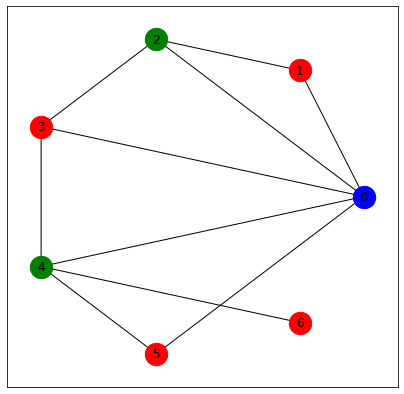

CPU times: user 444 ms, sys: 218 ms, total: 662 ms
Wall time: 447 ms


In [94]:
%%time
reset()
colors = CSP_Search(graph, 1)
print(colors)
print()
view_graph(colors, edges)

### Local Search

[2, 1, 0, 1, 0, 1, 1]



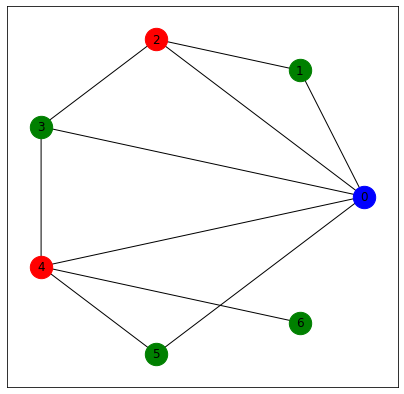

CPU times: user 408 ms, sys: 252 ms, total: 660 ms
Wall time: 407 ms


In [95]:
%%time
reset()
colors = CSP_Search(graph, 2)
print(colors)
print()
view_graph(colors, edges)

### AC3 Backtracking

Selected Node = 0
Color Selected = 0
COLOR given to Node 0 is 0
Selected Node = 4
Color Selected = 0
Color Selected = 2
COLOR given to Node 4 is 2
Selected Node = 2
Color Selected = 0
Color Selected = 1
COLOR given to Node 2 is 1
Selected Node = 3
Color Selected = 0
Color Selected = 1
Color Selected = 2
Color Selected = 2
COLOR given to Node 2 is 2
Selected Node = 3
Color Selected = 0
Color Selected = 1
COLOR given to Node 3 is 1
Selected Node = 1
Color Selected = 0
Color Selected = 1
COLOR given to Node 1 is 1
Selected Node = 5
Color Selected = 0
Color Selected = 1
COLOR given to Node 5 is 1
Selected Node = 6
Color Selected = 0
COLOR given to Node 6 is 0
[0, 1, 2, 1, 2, 1, 0]



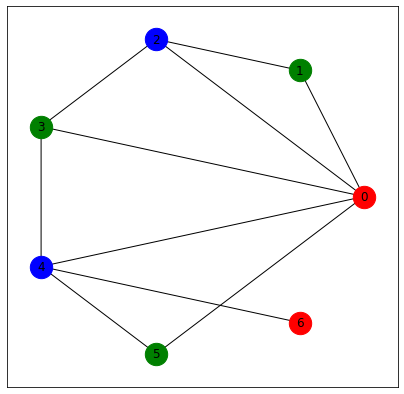

CPU times: user 439 ms, sys: 214 ms, total: 653 ms
Wall time: 454 ms


In [96]:
%%time
reset()
colors = CSP_Search(graph, 3)
print(colors)
print()
view_graph(colors, edges)